In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split

sys.path.append(os.getcwd())

try:
    from part_b_a_data_preprocessing import load_and_process_data
    from part_b_a_multilayer_perceptron_implementation import TwoLayerMLP
except ImportError:
    print("Error: Could not import your scripts. Make sure you are running this notebook from the 'src' folder!")

X_all, y_all = load_and_process_data('../train.csv')

X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

y_train_enc = np.eye(4)[y_train]
y_val_enc = np.eye(4)[y_val]

print(f"Data Loaded Successfully!")
print(f"X_train shape: {X_train.shape}") 

Data Loaded Successfully!
X_train shape: (33078, 12)


Epoch 0: Loss 1.8980 | Val Acc: 0.4865
Epoch 20: Loss 1.0353 | Val Acc: 0.5635
Epoch 40: Loss 0.9819 | Val Acc: 0.5686
Epoch 60: Loss 0.9318 | Val Acc: 0.5875
Epoch 80: Loss 0.8847 | Val Acc: 0.6210
Epoch 100: Loss 0.8412 | Val Acc: 0.6563
Epoch 120: Loss 0.8015 | Val Acc: 0.6797
Epoch 140: Loss 0.7656 | Val Acc: 0.6937
Epoch 160: Loss 0.7332 | Val Acc: 0.6994
Epoch 180: Loss 0.7041 | Val Acc: 0.7025

Epoch 0: Loss 5.0480 | Val Acc: 0.5401
Epoch 20: Loss 0.5171 | Val Acc: 0.7825
Epoch 40: Loss 0.4434 | Val Acc: 0.8033
Epoch 60: Loss 0.4178 | Val Acc: 0.8103
Epoch 80: Loss 0.4047 | Val Acc: 0.8144
Epoch 100: Loss 0.3964 | Val Acc: 0.8157
Epoch 120: Loss 0.3906 | Val Acc: 0.8168
Epoch 140: Loss 0.3862 | Val Acc: 0.8189
Epoch 160: Loss 0.3827 | Val Acc: 0.8209
Epoch 180: Loss 0.3799 | Val Acc: 0.8216


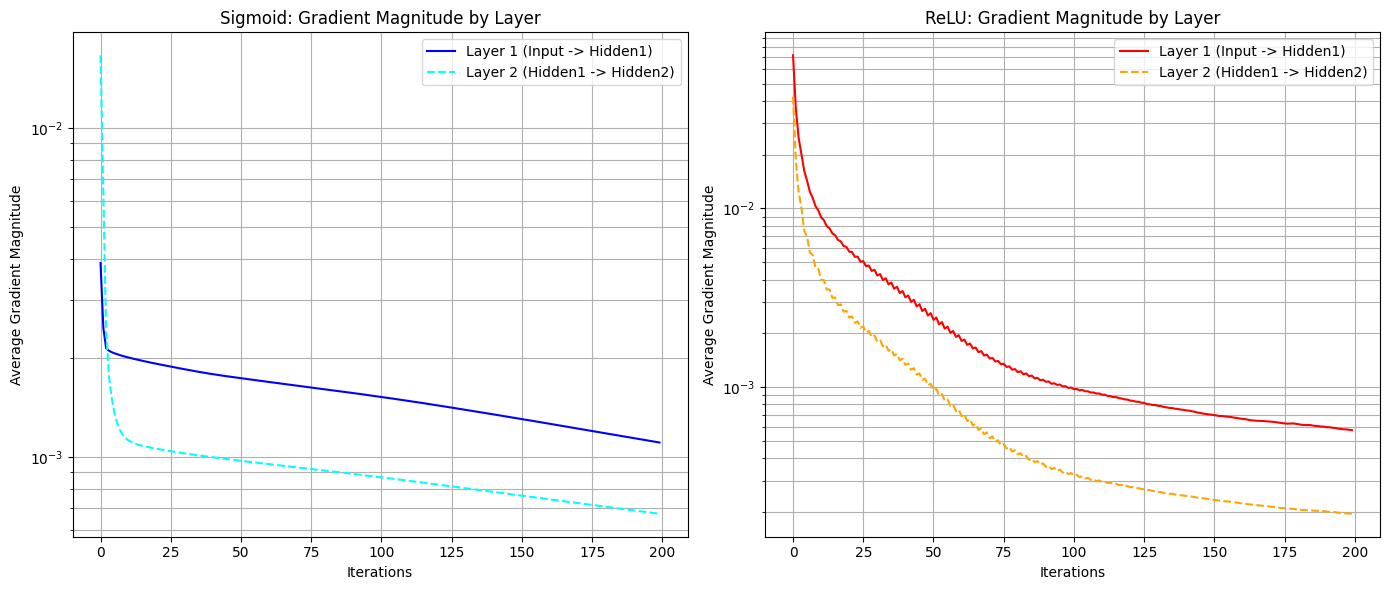

In [ ]:
INPUT_DIM = X_train.shape[1]
HIDDEN_DIM = 64
OUTPUT_DIM = 4
EPOCHS = 200
LEARNING_RATE = 0.1

print("Collecting Gradients for Sigmoid...")
mlp_sig = TwoLayerMLP(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, activation='sigmoid', learning_rate=LEARNING_RATE)
_, _, sig_w1_grads, sig_w2_grads = mlp_sig.train(X_train, y_train_enc, X_val, y_val_enc, epochs=EPOCHS)

print("\nCollecting Gradients for ReLU...")
mlp_relu = TwoLayerMLP(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, activation='relu', learning_rate=LEARNING_RATE)
_, _, relu_w1_grads, relu_w2_grads = mlp_relu.train(X_train, y_train_enc, X_val, y_val_enc, epochs=EPOCHS)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(sig_w1_grads, label='Layer 1 (Input -> Hidden1)', color='blue')
plt.plot(sig_w2_grads, label='Layer 2 (Hidden1 -> Hidden2)', color='cyan', linestyle='--')
plt.title('Sigmoid: Gradient Magnitude by Layer')
plt.xlabel('Iterations')
plt.ylabel('Average Gradient Magnitude')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.subplot(1, 2, 2)
plt.plot(relu_w1_grads, label='Layer 1 (Input -> Hidden1)', color='red')
plt.plot(relu_w2_grads, label='Layer 2 (Hidden1 -> Hidden2)', color='orange', linestyle='--')
plt.title('ReLU: Gradient Magnitude by Layer')
plt.xlabel('Iterations')
plt.ylabel('Average Gradient Magnitude')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.tight_layout()
plt.savefig('../plots/gradient_magnitude_comparison.png', dpi=300)
plt.show()

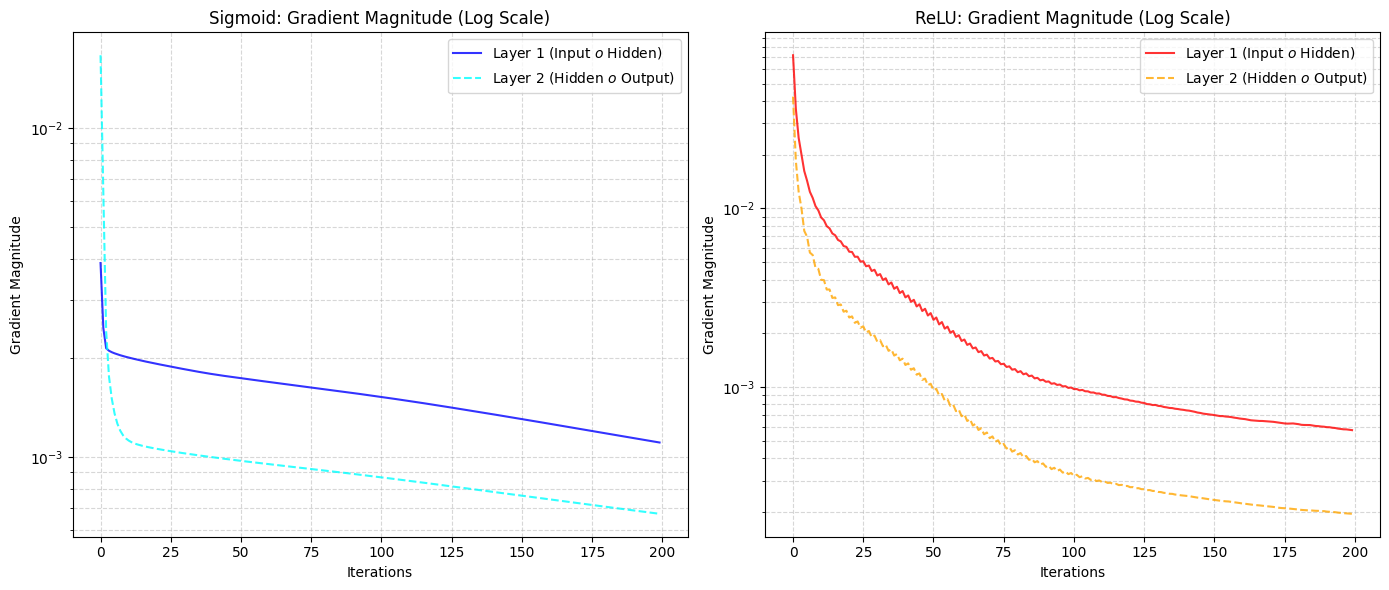

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(sig_w1_grads, label='Layer 1 (Input $\to$ Hidden)', color='blue', alpha=0.8)
plt.plot(sig_w2_grads, label='Layer 2 (Hidden $\to$ Output)', color='cyan', linestyle='--', alpha=0.8)
plt.title('Sigmoid: Gradient Magnitude (Log Scale)')
plt.xlabel('Iterations')
plt.ylabel('Gradient Magnitude')
plt.yscale('log') 
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(relu_w1_grads, label='Layer 1 (Input $\to$ Hidden)', color='red', alpha=0.8)
plt.plot(relu_w2_grads, label='Layer 2 (Hidden $\to$ Output)', color='orange', linestyle='--', alpha=0.8)
plt.title('ReLU: Gradient Magnitude (Log Scale)')
plt.xlabel('Iterations')
plt.ylabel('Gradient Magnitude')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('../plots/gradient_magnitude_comparison.png', dpi=300)
plt.show()